In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"E:\LUMIA 525\DS\Notes\datasets\Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.shape

(800, 13)

In [4]:
null = (df.isnull().sum())/(df.isnull().count())*100
null.sort_values(ascending=False)

Type 2        48.25
Legendary      0.00
Generation     0.00
Speed          0.00
Sp. Def        0.00
Sp. Atk        0.00
Defense        0.00
Attack         0.00
HP             0.00
Total          0.00
Type 1         0.00
Name           0.00
#              0.00
dtype: float64

In [5]:
df.drop(['#','Name','Type 2'],axis=1,inplace=True)

In [6]:
df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False


In [7]:
null = (df.isnull().sum())/(df.isnull().count())*100
null.sort_values(ascending=False)

Legendary     0.0
Generation    0.0
Speed         0.0
Sp. Def       0.0
Sp. Atk       0.0
Defense       0.0
Attack        0.0
HP            0.0
Total         0.0
Type 1        0.0
dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

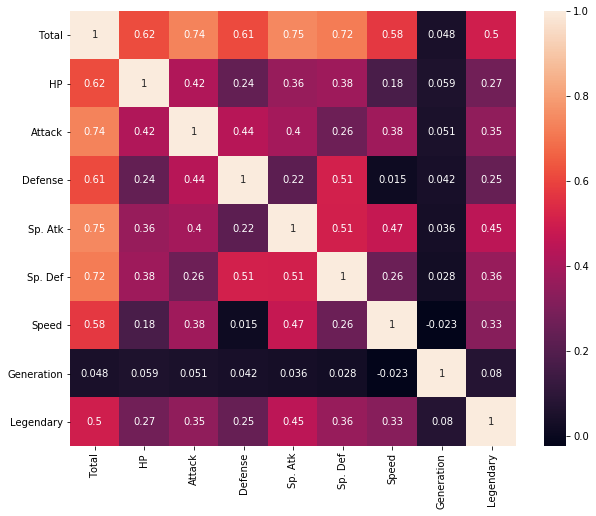

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

def con_Legendary(x):
    if x =='False':
        return 0
    else:
        return 1
    
df['Legendary'] = df['Legendary].apply(con_Legendary)

In [10]:
df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False


In [11]:
false=(df['Legendary'].value_counts()[False]/len(df['Legendary']))*100
true=(df['Legendary'].value_counts()[True]/len(df['Legendary']))*100

In [12]:
print(false),print(true)

91.875
8.125


(None, None)

In [13]:
dumm = pd.get_dummies(df['Type 1'])
df = pd.concat([df,dumm],axis=1)
df.drop(['Type 1','Water'],axis=1,inplace=True)

In [14]:
X = df.drop('Legendary',axis=1)
Y = df['Legendary']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

# LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


90.42

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(logreg, X_train, Y_train, cv=10)
confusion_matrix(Y_train, predictions)

C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

array([[512,   9],
       [ 26,  13]], dtype=int64)

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(), X, Y, cv=cv)

C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

array([0.91875, 0.925  , 0.89375, 0.91875, 0.94375, 0.925  , 0.94375,
       0.95625, 0.91875, 0.90625])

# RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

92.92

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=10)
confusion_matrix(Y_train, predictions)

array([[514,   7],
       [ 18,  21]], dtype=int64)

In [21]:
cross_val_score(RandomForestClassifier(), X, Y, cv=cv)

array([0.9625 , 0.95625, 0.95625, 0.925  , 0.96875, 0.95   , 0.975  ,
       0.96875, 0.93125, 0.94375])

# DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

95.0

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=10)
confusion_matrix(Y_train, predictions)

array([[507,  14],
       [ 13,  26]], dtype=int64)

In [24]:
cross_val_score(DecisionTreeClassifier(), X, Y, cv=cv)

array([0.95625, 0.95625, 0.925  , 0.9625 , 0.96875, 0.975  , 0.98125,
       0.96875, 0.95625, 0.95625])

# XGBOOST

In [25]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, Y_train)

Y_pred = XGBC.predict(X_test)

acc_XGB = round(XGBC.score(X_test, Y_test) * 100, 2)
acc_XGB

93.75

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(XGBC, X_train, Y_train, cv=10)
confusion_matrix(Y_train, predictions)

array([[507,  14],
       [  9,  30]], dtype=int64)